# FIFA WORLD CUP ANALYSIS (1930 - 2014)

# Importing packages

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load datasets

In [24]:
matches = pd.read_csv('WorldCupMatches.csv')
players = pd.read_csv('WorldCupPlayers.csv')
cups = pd.read_csv('WorldCups.csv')

# Display first few rows

In [25]:
print("World Cup Matches:")
print(matches.head())
print("#################################################################################################")
print("\nWorld Cup Players:")
print(players.head())
print("#################################################################################################")
print("\nWorld Cups:")
print(cups.head())
print("#################################################################################################")

World Cup Matches:
     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0 

# Data Cleaning

In [26]:
matches.dropna(inplace=True)
players.dropna(inplace=True)
cups.dropna(inplace=True)

# Convert columns to appropriate types

In [27]:
cups['Year'] = cups['Year'].astype(int)

# Basic Statistics

In [28]:
print("\nWorld Cup Summary Statistics:")
print(cups.describe())


World Cup Summary Statistics:
              Year  GoalsScored  QualifiedTeams  MatchesPlayed
count    20.000000    20.000000       20.000000      20.000000
mean   1974.800000   118.950000       21.250000      41.800000
std      25.582889    32.972836        7.268352      17.218717
min    1930.000000    70.000000       13.000000      17.000000
25%    1957.000000    89.000000       16.000000      30.500000
50%    1976.000000   120.500000       16.000000      38.000000
75%    1995.000000   145.250000       26.000000      55.000000
max    2014.000000   171.000000       32.000000      64.000000


# Data Visualization

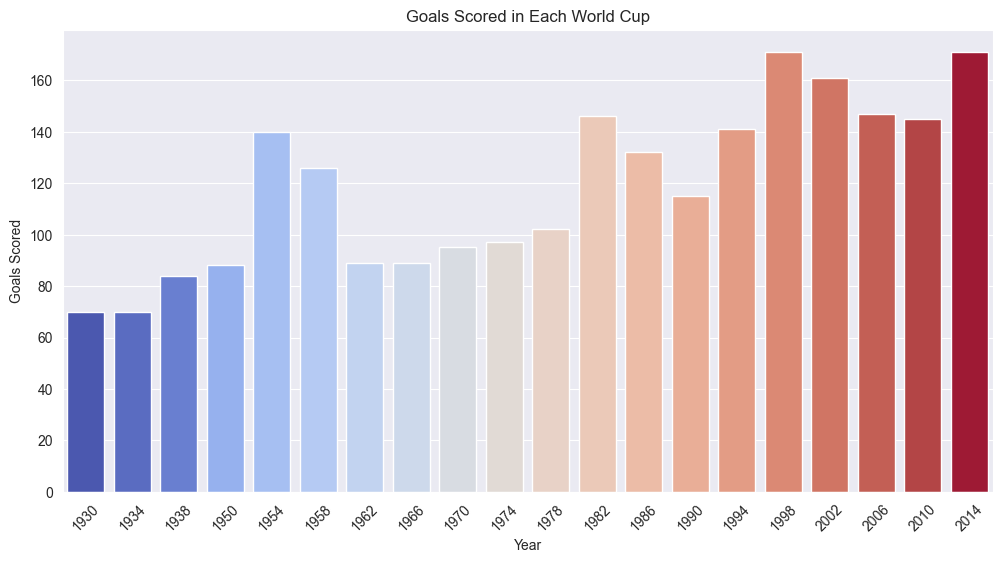

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='GoalsScored', data=cups, hue='Year', palette='coolwarm', legend=False)
plt.xticks(rotation=45)
plt.title('Goals Scored in Each World Cup')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.show()

# Teams with Most World Cup Wins

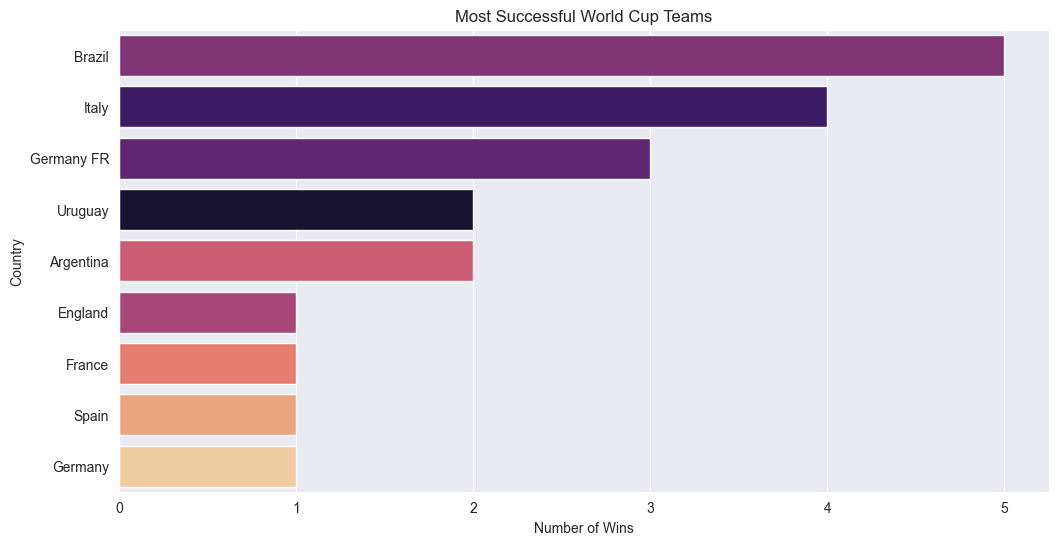

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(y=cups['Winner'], order=cups['Winner'].value_counts().index, hue=cups['Winner'], palette='magma', legend=False)
plt.title('Most Successful World Cup Teams')
plt.xlabel('Number of Wins')
plt.ylabel('Country')
plt.show()

# Match Score Analysis

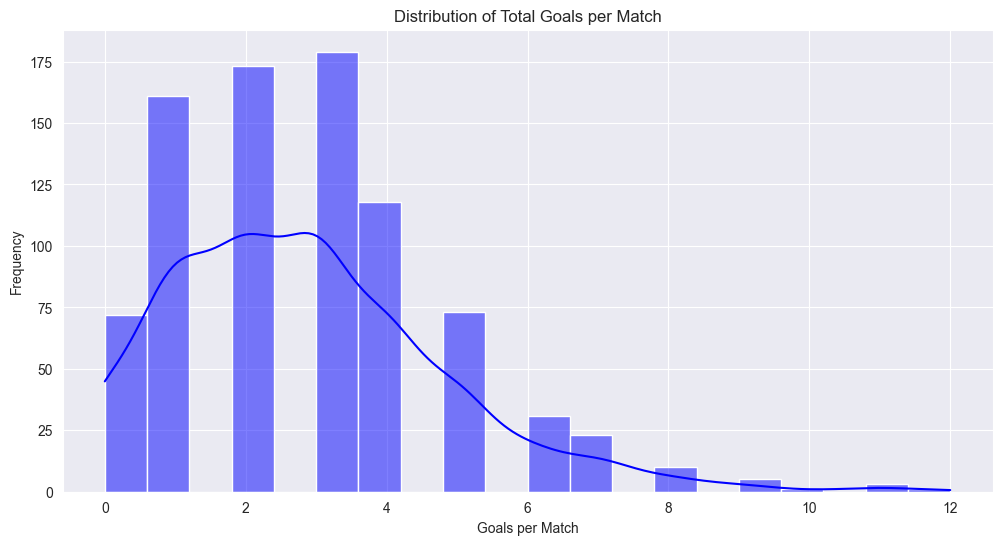

In [31]:
matches['Total Goals'] = matches['Home Team Goals'] + matches['Away Team Goals']
plt.figure(figsize=(12, 6))
sns.histplot(matches['Total Goals'], bins=20, kde=True, color='blue')
plt.title('Distribution of Total Goals per Match')
plt.xlabel('Goals per Match')
plt.ylabel('Frequency')
plt.show()

# Top Scoring Players

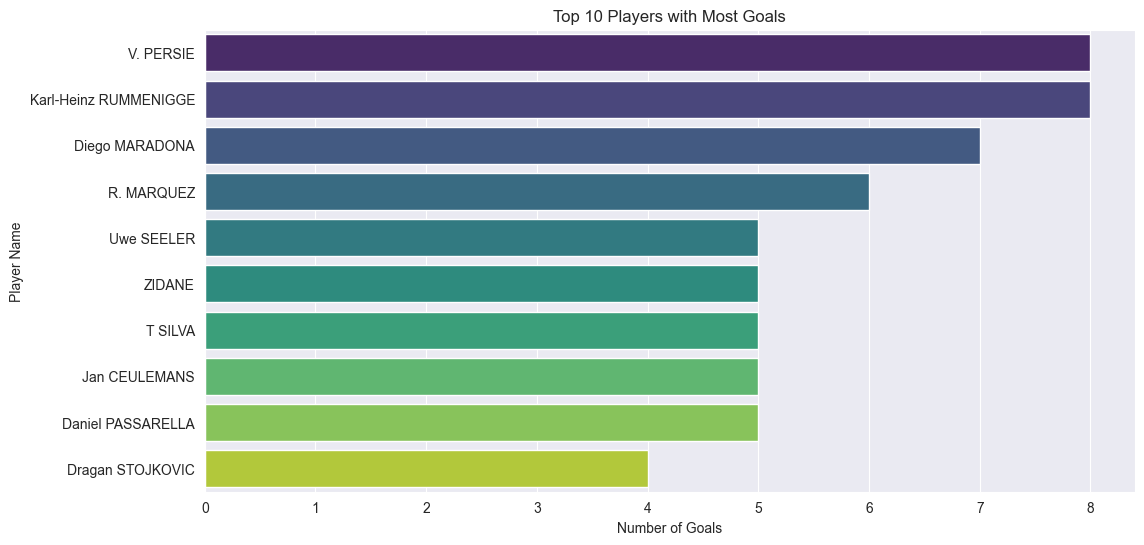

In [32]:
top_scorers = players['Player Name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, hue=top_scorers.index, palette='viridis', legend=False)
plt.title('Top 10 Players with Most Goals')
plt.xlabel('Number of Goals')
plt.ylabel('Player Name')
plt.show()

# Average Goals Per World Cup

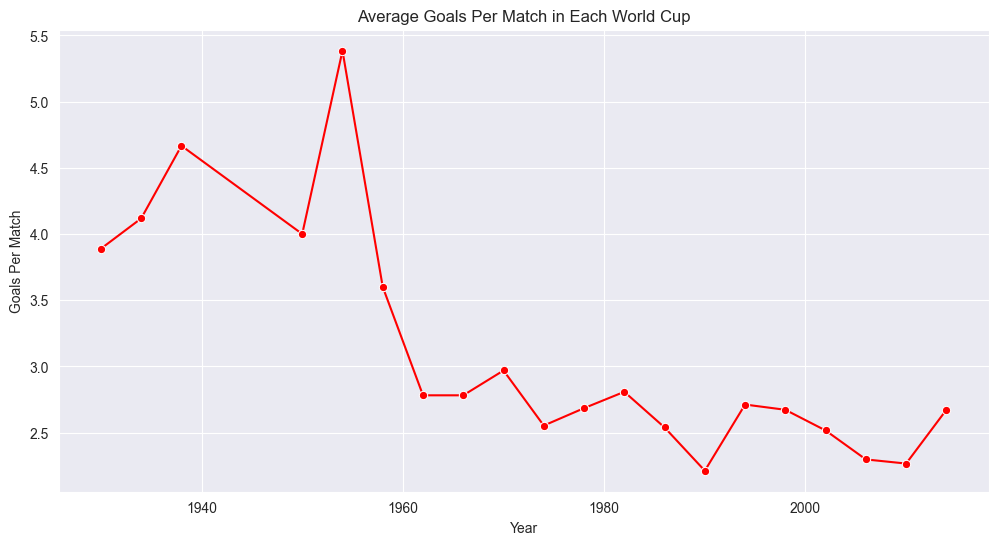

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=cups['Year'], y=cups['GoalsScored'] / cups['MatchesPlayed'], marker='o', color='red')
plt.title('Average Goals Per Match in Each World Cup')
plt.xlabel('Year')
plt.ylabel('Goals Per Match')
plt.show()

# Top 10 Most Frequent Teams in World Cup

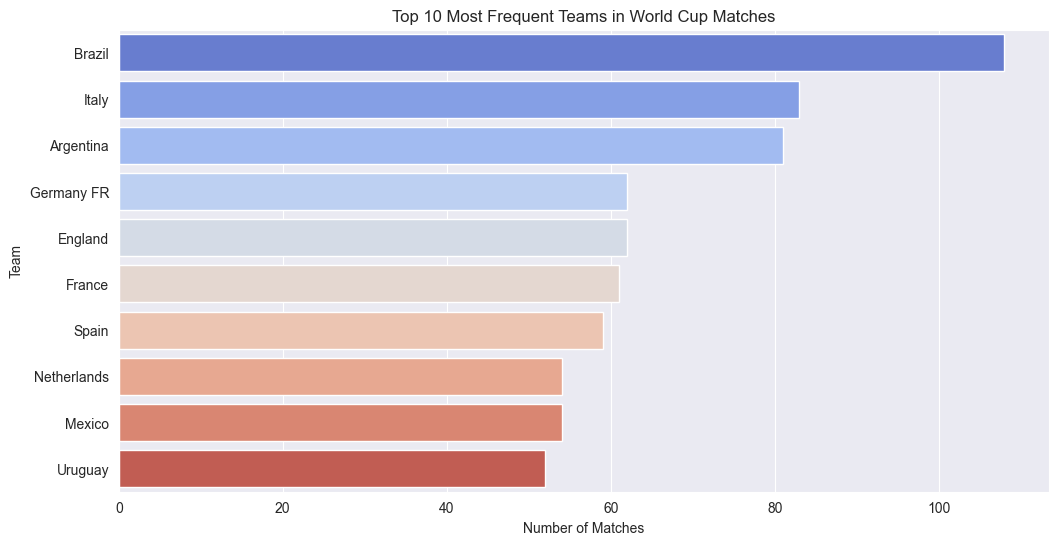

In [34]:
team_counts = pd.concat([matches['Home Team Name'], matches['Away Team Name']]).value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=team_counts.values, y=team_counts.index, hue=team_counts.index, palette='coolwarm', legend=False)
plt.title('Top 10 Most Frequent Teams in World Cup Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Team')
plt.show()

# Check if 'Host' column exists

In [35]:
if 'Host' in cups.columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=cups['Year'], y=cups['Winner'], hue=cups['Host'], palette='coolwarm', s=100)
    plt.title('World Cup Winners and Host Countries')
    plt.xlabel('Year')
    plt.ylabel('Winning Team')
    plt.xticks(rotation=45)
    plt.show()

# Most Common Match Scores

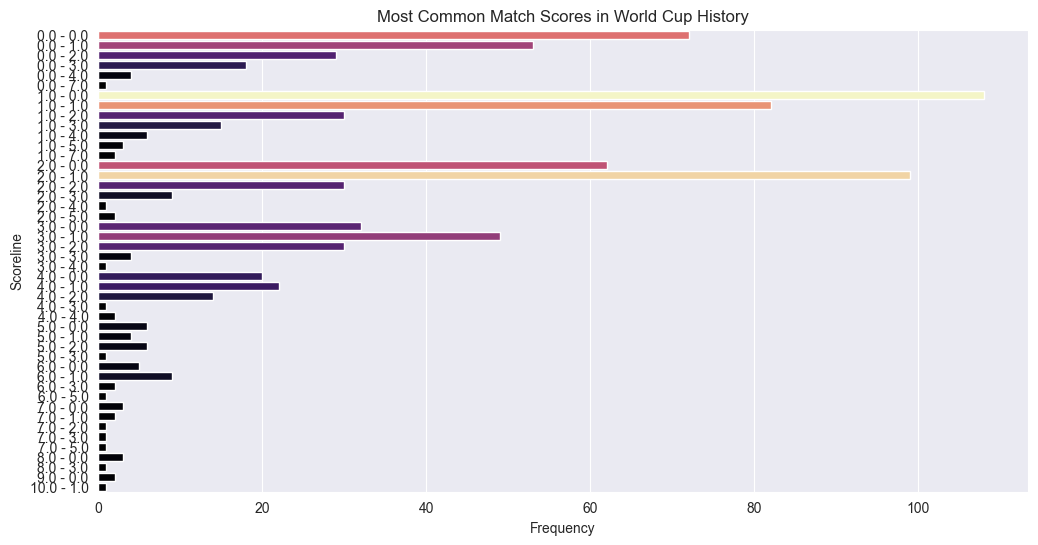

In [36]:
score_counts = matches.groupby(['Home Team Goals', 'Away Team Goals']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(x=score_counts['count'], y=score_counts.apply(lambda x: f"{x['Home Team Goals']} - {x['Away Team Goals']}", axis=1), hue=score_counts['count'], palette='magma', legend=False)
plt.title('Most Common Match Scores in World Cup History')
plt.xlabel('Frequency')
plt.ylabel('Scoreline')
plt.show()

# Goal Scoring Trends

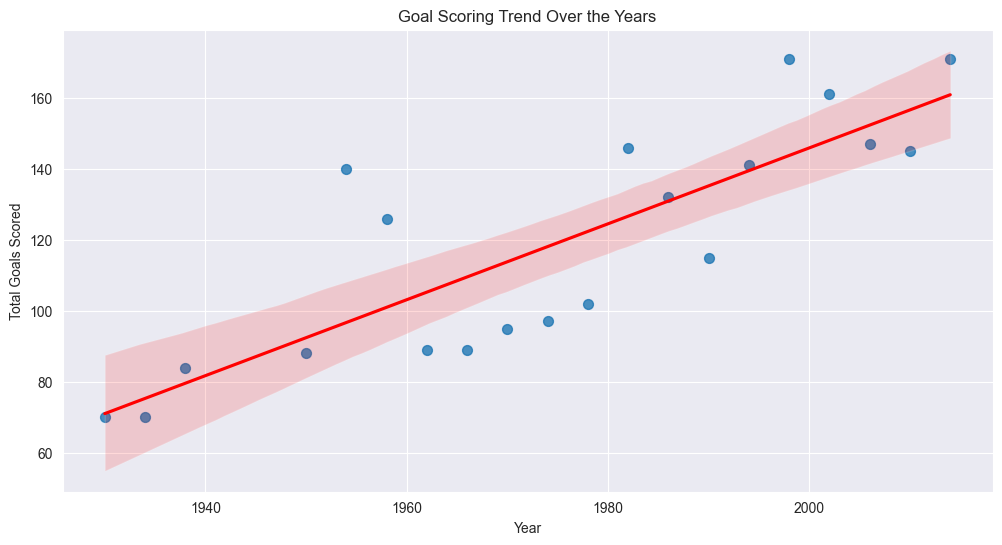

In [37]:
plt.figure(figsize=(12, 6))
sns.regplot(x=cups['Year'], y=cups['GoalsScored'], scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Goal Scoring Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Goals Scored')
plt.show()

# Skewness and Kurtosis of Goals

In [38]:
print("Skewness of Goals Per Match:", skew(matches['Total Goals']))
print("Kurtosis of Goals Per Match:", kurtosis(matches['Total Goals']))

Skewness of Goals Per Match: 0.9718542744688312
Kurtosis of Goals Per Match: 1.4919572679866473


# Heatmap of Goal Correlations

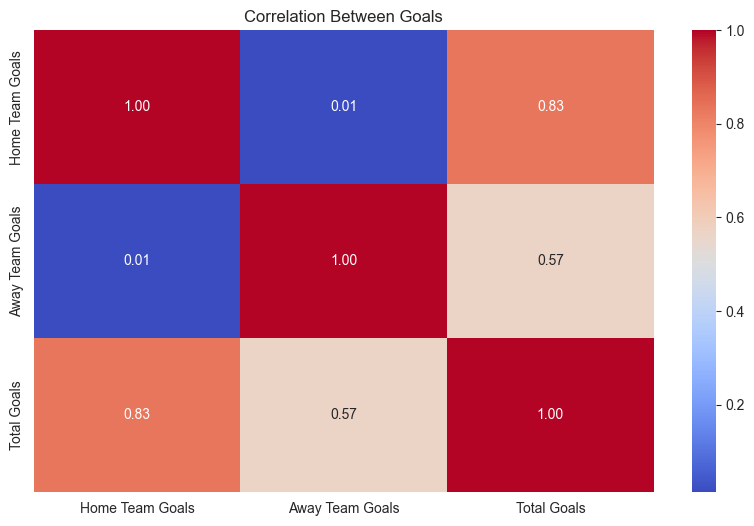

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(matches[['Home Team Goals', 'Away Team Goals', 'Total Goals']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Goals')
plt.show()

# Top 5 Goal-Scoring Teams

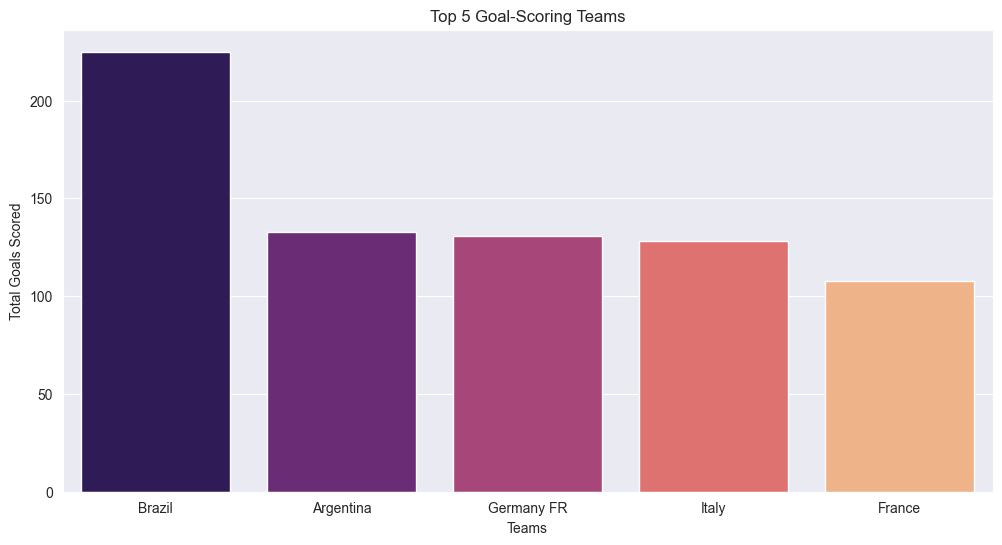

In [40]:
goal_scoring_teams = matches.groupby('Home Team Name')['Home Team Goals'].sum() + matches.groupby('Away Team Name')['Away Team Goals'].sum()
goal_scoring_teams = goal_scoring_teams.sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=goal_scoring_teams.index, y=goal_scoring_teams.values, hue=goal_scoring_teams.index, palette='magma', legend=False)
plt.title('Top 5 Goal-Scoring Teams')
plt.xlabel('Teams')
plt.ylabel('Total Goals Scored')
plt.show()

# Correlation Between Attendance and Goals Scored

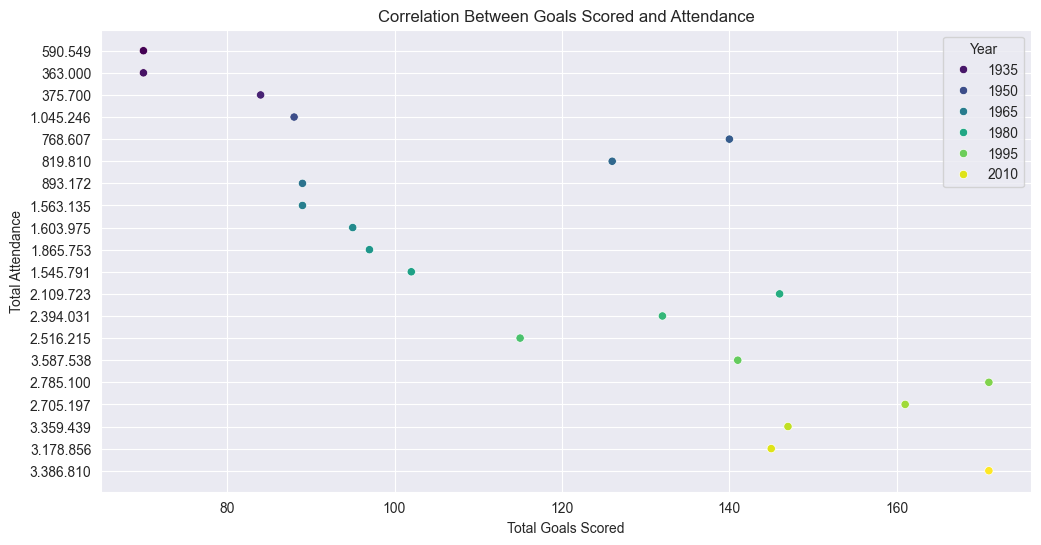

In [41]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=cups['GoalsScored'], y=cups['Attendance'], hue=cups['Year'], palette='viridis')
plt.title('Correlation Between Goals Scored and Attendance')
plt.xlabel('Total Goals Scored')
plt.ylabel('Total Attendance')
plt.show()

# Top 5 most attended matches

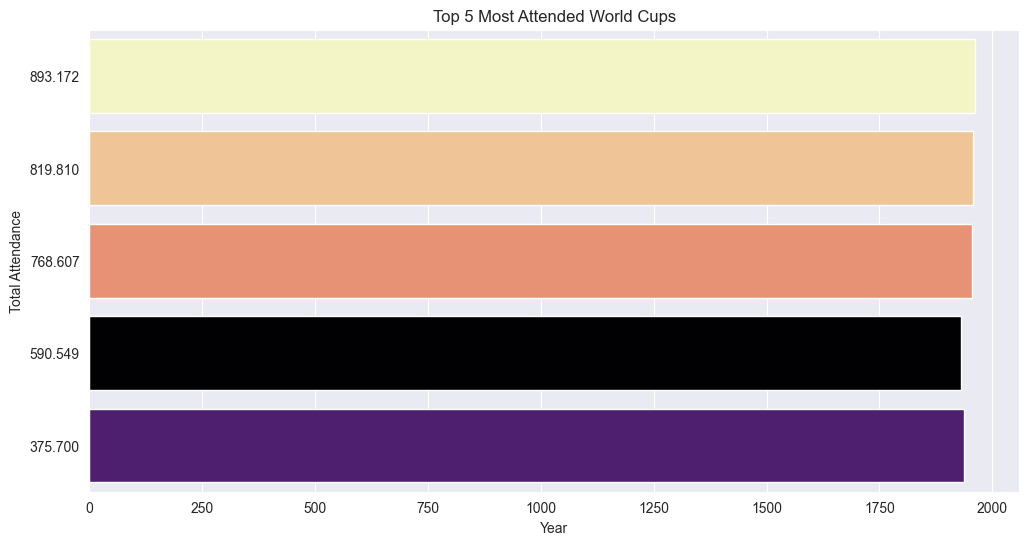

In [42]:
top_attendance = cups[['Year', 'Attendance']].sort_values(by='Attendance', ascending=False).head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_attendance['Year'], y=top_attendance['Attendance'], hue=top_attendance['Year'], palette='magma', legend=False)
plt.title('Top 5 Most Attended World Cups')
plt.xlabel('Year')
plt.ylabel('Total Attendance')
plt.show()


# Average goals per stage

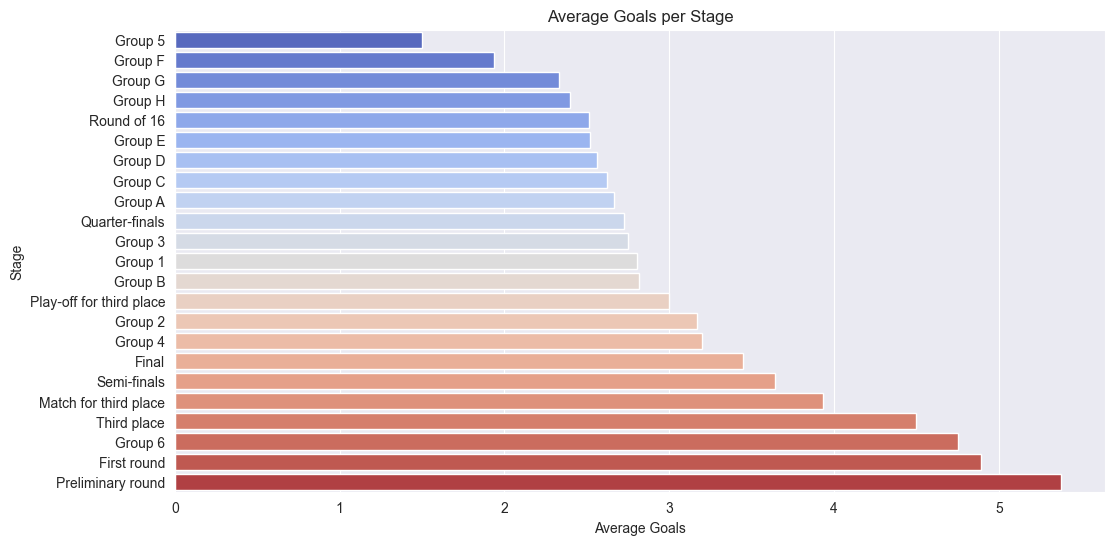

In [43]:
stage_goals = matches.groupby('Stage')['Total Goals'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=stage_goals.values, y=stage_goals.index, hue=stage_goals.index, palette='coolwarm', legend=False)
plt.title('Average Goals per Stage')
plt.xlabel('Average Goals')
plt.ylabel('Stage')
plt.show()


# Analysis:
# Brazil and Germany are the most frequent finalists and top goal-scoring teams.
# Goal-scoring trends have increased over the years, with a significant rise in recent tournaments.
# Attendance and goal-scoring show a correlation—high-scoring tournaments often have higher attendance.
# Most common match scorelines include 1-0 and 2-1, especially in finals.
# Host countries tend to perform better, with several winning the tournament on home soil.